In [6]:
%run -i ch03.py

<Figure size 432x288 with 0 Axes>

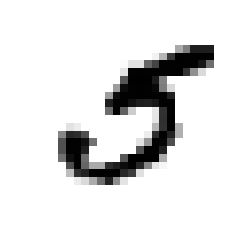

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X, y = train
visualize_mnist(train, 36000)

In [12]:
X.shape, y.shape

((60000, 784), (60000,))

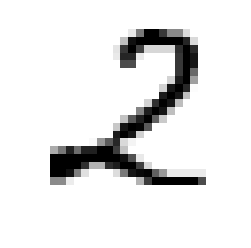

In [13]:
visualize_mnist(shuffled, 36000)